In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sys

In [2]:
#importing datasets
data = pd.read_csv('/content/Social_Network_Ads.csv') #data değişkenine dataset aktarıldı.

In [3]:
data.shape #(row,column)

(400, 5)

In [4]:
data.info()  #dataset hakkında bilgi verildi.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
data.columns  #column isimleri gösterildi.

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [6]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [8]:
data.isnull().sum()   #null değer var mı bakıldı.

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
data.drop("User ID", axis = 1, inplace = True)  #ID sütunundaki değerlerin target değeri için önemi yok.o yüzden kaldırıldı.

In [10]:
data.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


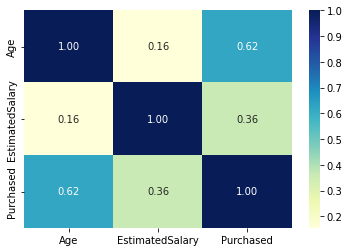

In [11]:
sns.heatmap(data.corr(), annot = True,fmt=".2f", cmap = 'YlGnBu' )
plt.show()

In [12]:
gender = pd.get_dummies(data['Gender'], drop_first=True)   #gender sütunu string değerler barındırır.
                                                       
dataset = pd.concat([gender, data], axis=1)
data.drop(columns=['Gender'], axis=1, inplace=True)

In [13]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [14]:
x = data.iloc[:, [0,1]].values    #Features
y = data.iloc[:, 2].values     #Targets

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size= 0.25, random_state=0)

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)          #feature scaling yapılır.

In [19]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators= 10, criterion= 'entropy')
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [20]:
y_pred= classifier.predict(x_test)

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[64,  4],
       [ 4, 28]])

In [71]:
Acc = []
for i in range (1,100):
  from sklearn.ensemble import RandomForestClassifier
  rf = RandomForestClassifier(n_estimators = i,max_depth=3,random_state = 1)
  rf.fit(x_train,y_train)
  Acc.append(rf.score(x_test,y_test))

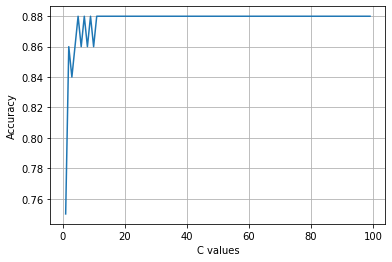

In [73]:
plt.plot(range(1,100),Acc)
plt.xlabel("C values")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [75]:
y_pred = rf.predict(x_test)
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test, y_pred)
matrix

array([[49,  9],
       [ 3, 39]])

In [76]:
Acc = []
for i in range (1,6):
  for j in range(1,100):
    from sklearn.ensemble import RandomForestClassifier
    rf = RandomForestClassifier(n_estimators = j,max_depth=i,random_state = 1)
    rf.fit(x_train,y_train)
    Acc.append(rf.score(x_test,y_test))

In [77]:
len(Acc)

495

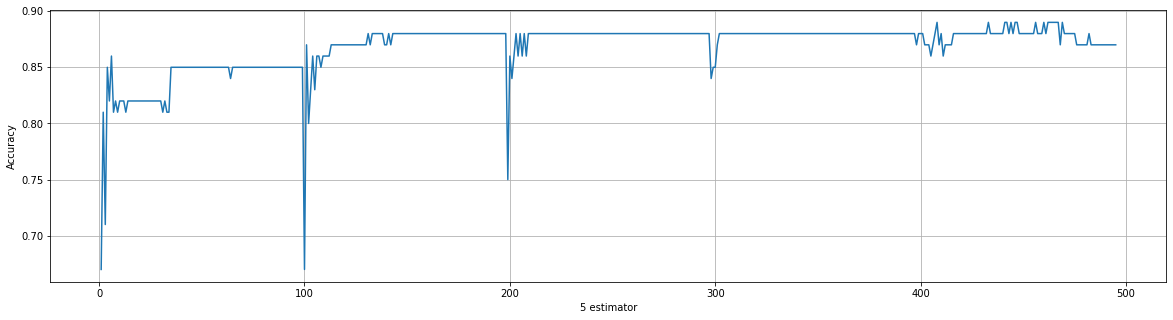

In [81]:
plt.figure(figsize=(20,5))
plt.plot(range(1,496),Acc)
plt.xlabel("5 estimator")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [79]:
y_pred = rf.predict(x_test)
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test, y_pred)
matrix

array([[49,  9],
       [ 4, 38]])

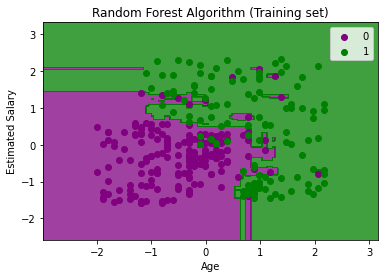

In [22]:
#Visulaizing the trianing set result
from matplotlib.colors import ListedColormap
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

x_set, y_set = x_train, y_train
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step =0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('purple','green' )))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],c = ListedColormap(('purple', 'green'))(i), label = j)
plt.title('Random Forest Algorithm (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

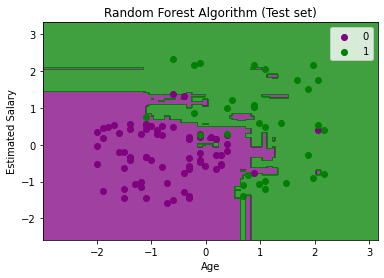

In [24]:
#Visulaizing the test set result
from matplotlib.colors import ListedColormap
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

x_set, y_set = x_test, y_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step =0.01),
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('purple','green' )))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],c = ListedColormap(('purple', 'green'))(i), label = j)
plt.title('Random Forest Algorithm (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

# **COMPARISON OF ALGORITHMS ALL TOGETHER**

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

dt = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors= 5)
logreg = LogisticRegression()
nb = GaussianNB()
svm = SVC(C=1)
rf = RandomForestClassifier(n_estimators = 100,random_state = 1)

In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size= 0.25, random_state=1)

In [65]:
dt.fit(x_train,y_train)
knn.fit(x_train,y_train)
logreg.fit(x_train,y_train)
svm.fit(x_train,y_train)
nb.fit(x_train,y_train)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [66]:
y_pred_dt = dt.predict(x_test)
y_pred_knn = knn.predict(x_test)
y_pred_logreg = logreg.predict(x_test)
y_pred_svm = svm.predict(x_test)
y_pred_nb = nb.predict(x_test)
y_pred_rf = rf.predict(x_test)

In [67]:
from sklearn.metrics import accuracy_score
acc_dt = accuracy_score(y_test,y_pred_dt)
acc_knn = accuracy_score(y_test,y_pred_knn)
acc_logreg = accuracy_score(y_test,y_pred_logreg)
acc_svm = accuracy_score(y_test,y_pred_svm)
acc_nb = accuracy_score(y_test,y_pred_nb)
acc_rf = accuracy_score(y_test,y_pred_rf)

In [80]:
print("Accuracy Score of Decision Tree : ",acc_dt)
print("Accuracy Score of KNN : ",acc_knn)
print("Accuracy Score of Logistic Regression : ",acc_logreg)
print("Accuracy Score of SVM : ",acc_svm)
print("Accuracy Score of Naive Bayes : ",acc_nb)
print("Accuracy Score of Random Forest : ",acc_rf)

Accuracy Score of Decision Tree :  0.82
Accuracy Score of KNN :  0.75
Accuracy Score of Logistic Regression :  0.84
Accuracy Score of SVM :  0.68
Accuracy Score of Naive Bayes :  0.86
Accuracy Score of Random Forest :  0.88


In [69]:
from sklearn.metrics import confusion_matrix
cm_matrix_dt=confusion_matrix(y_test, y_pred_dt)
cm_matrix_knn=confusion_matrix(y_test, y_pred_knn)
cm_matrix_logreg=confusion_matrix(y_test, y_pred_logreg)
cm_matrix_svm=confusion_matrix(y_test, y_pred_svm)
cm_matrix_nb=confusion_matrix(y_test, y_pred_nb)
cm_matrix_rf=confusion_matrix(y_test, y_pred_nb)

print("DT:", cm_matrix_dt)
print("KNN:" ,cm_matrix_knn)
print("LG:" ,cm_matrix_logreg)
print("SVM:" ,cm_matrix_svm)
print("NB:" ,cm_matrix_nb)
print("RF:" ,cm_matrix_rf)

DT: [[50  8]
 [10 32]]
KNN: [[49  9]
 [16 26]]
LG: [[52  6]
 [10 32]]
SVM: [[52  6]
 [26 16]]
NB: [[51  7]
 [ 7 35]]
RF: [[51  7]
 [ 7 35]]


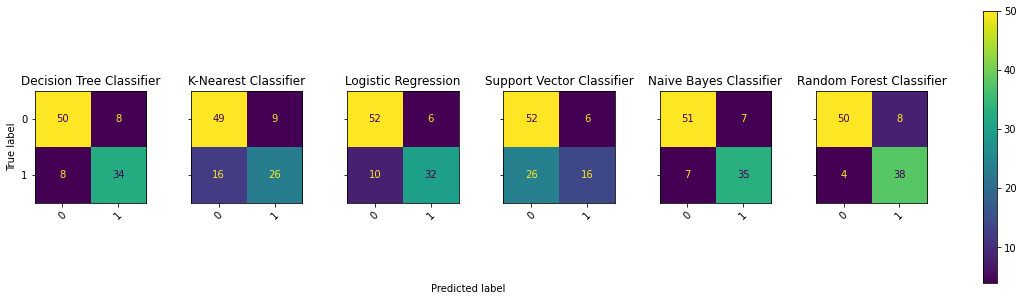

In [70]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

classifiers = {
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "K-Nearest Classifier": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Classifier": SVC(),
    "Naive Bayes Classifier": GaussianNB(),
    "Random Forest Classifier": RandomForestClassifier(n_estimators = 100,random_state = 1),
}

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size= 0.25, random_state=1)

f, axes = plt.subplots(1, 6, figsize=(20, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(x_train, y_train).predict(x_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.4, hspace=0.1)


f.colorbar(disp.im_, ax=axes)
plt.show()